# Exercise 6: Decision Making II
### Lukas Dippold and Evert de Man

### Exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

#### (1)

In [2]:
N = 2 * 50 + 1
dx = 1
dt = 1
M = int(1000 / dt)

matrix = np.zeros([N, M])
matrix[50, 0] = 1

#### (2)

In [3]:
def transition_prob(x, x_, dt, mu, sigma):
    within_exp = (- (x - x_ - mu*dt)**2) / (2 * sigma ** 2 * dt) 
    expon = np.exp(within_exp)
    frac = 1 / np.sqrt(2 * np.pi * sigma**2 * dt)
    return expon*frac

In [6]:
transition_matrix = np.zeros([N, N])

for i in range(N):
    for j in range(N):
        x = i
        x_ = j
        transition_matrix[j, i] = transition_prob(x, x_, dt, mu = 0.1, sigma = 1.0)
#without for loops use meshgrid

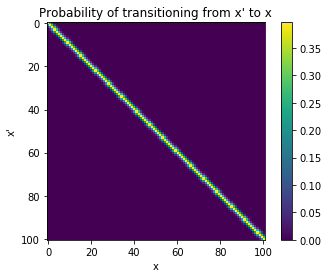

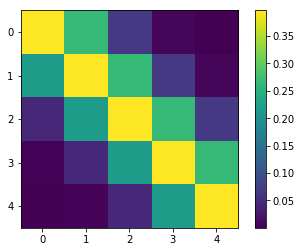

In [7]:
plt.imshow(transition_matrix)
plt.title("Probability of transitioning from x' to x")
plt.ylabel("x'")
plt.xlabel("x")
plt.colorbar()
plt.show()

plt.imshow(transition_matrix[0:5, 0:5])
plt.colorbar()
plt.show()

#### (3)

In [8]:
# Filling out the matrix
for t in range(M-1):
    matrix[:, t + 1] = np.dot(matrix[:, t], transition_matrix)

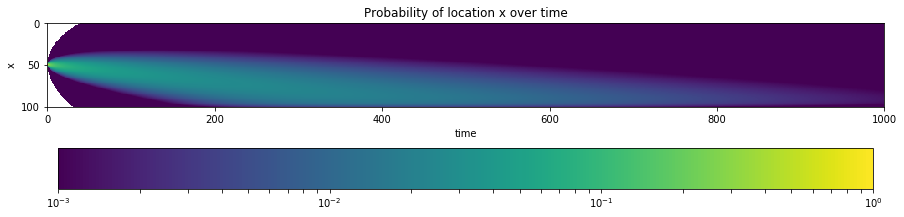

In [9]:
plt.figure(figsize = [15, 5])
plt.imshow(matrix, norm=LogNorm(vmin=0.001, vmax=1))
plt.xlabel("time")
plt.ylabel("x")
plt.colorbar(orientation = "horizontal")
plt.title("Probability of location x over time")
plt.show()

#### (4)

The decision boundary is for $x = 0$ and $x = 100$, so our decision boundary is $+/- 50$ It is the N-value in the code. We have no values outside of these areas as the transition matrix is not defined for transitioning elsewhere. If it were, there would be a chance to travel back across the decision boundary which is not a possibility in the paradigm. 

- this is an absorbing boundary
- it is the rectangular window along with the repeated application of the transition probs that leads to the absorption


#### (5)

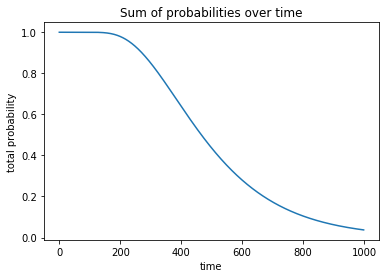

In [8]:
sum_of_probs = np.sum(matrix, axis = 0)

plt.plot(range(M), sum_of_probs)
plt.title("Sum of probabilities over time")
plt.xlabel("time")
plt.ylabel("total probability")
plt.show()

The probabilities are not normalized as probability is "lost" at the edges, in the case that there is a probability of going to x outside of the $[0, 50]$ space. This starts happening quickly when $t = 200$ is reached and as you can see in the previous graph, that is when the yellow fan reaches the border of $x = 0$. 
- we want this absorbing boundary condition.

#### (6)

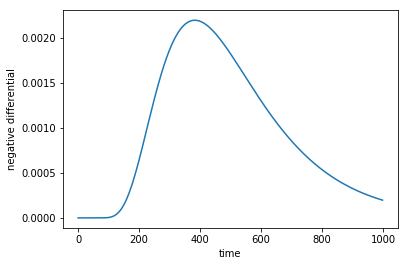

In [9]:
neg_deriv = -np.diff(sum_of_probs)
plt.plot(neg_deriv)
plt.xlabel("time")
plt.ylabel("negative differential")
plt.show()

This curve looks very similar to the reaction time graph of the previous sheet. This is due to the fact that when the summed probabilities go down, the boundaries of x are being reached (as in the last exercise). Therefore, the chances that a decision is made are high here and therefore the graphs look the same. The negative is taken because when the summed probabilities go down, the chance of the boundary being reached (e.g. a decision being made) go up. 
- it is the reaction time distribution

#### (7)

With the information that we have, we can only assess whether a decision has been made. To determine which of the two desicions is made, the "lost" probabilities that go outside the boundaries for x would have to be stored, and the relation between the two would reveal the relationship between the amplitudes for the reaction times. 
- it is not possible to distinguish the prob of making a prtiular decision evolves over time


### Exercise 2

#### (1)

In [10]:
N = 2 * 50 + 1
dx = 1
dt = 1
M = int(1000 / dt)

matrix_FP = np.zeros([N, M])
matrix_FP[50, 0] = 1

#### (2)

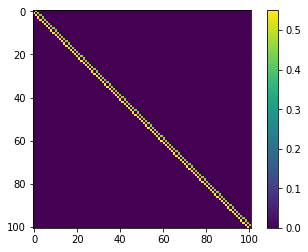

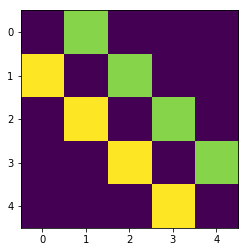

In [11]:
def transition_matrix_FP(dt, dx, mu = 0.1, sigma = 1.0):

    transition_matrix = np.zeros([N,N])
    r = dt/dx**2
    
    np.fill_diagonal(transition_matrix, 1-r*sigma**2)
    np.fill_diagonal(transition_matrix[1:,:], 0.5*(r*mu/dx + r*sigma**2))
    np.fill_diagonal(transition_matrix[:,1:], 0.5*(-r*mu/dx + r*sigma**2))

    return transition_matrix

tm_FP = transition_matrix_FP(dt, dx)

plt.imshow(tm_FP)
plt.colorbar()
plt.show()

plt.imshow(tm_FP[0:5, 0:5])

#### (3)

In [12]:
# Filling out the matrix
for t in range(M-1):
    matrix_FP[:, t + 1] = np.dot(matrix_FP[:, t], tm_FP.T)

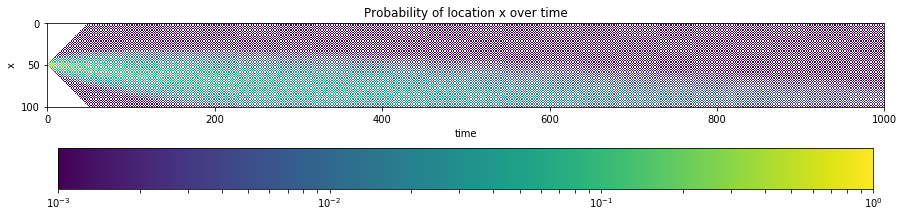

In [13]:
plt.figure(figsize = [15, 5])
plt.imshow(matrix_FP, norm=LogNorm(vmin=0.001, vmax=1))
plt.xlabel("time")
plt.ylabel("x")
plt.colorbar(orientation = "horizontal")
plt.title("Probability of location x over time")
plt.show()

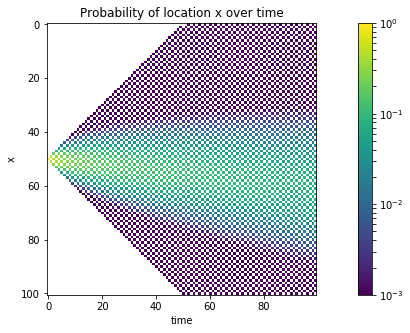

In [14]:
plt.figure(figsize = [15, 5])
plt.imshow(matrix_FP[:, 0:100], norm=LogNorm(vmin=0.001, vmax=1))
plt.xlabel("time")
plt.ylabel("x")
plt.colorbar()
plt.title("Probability of location x over time")
plt.show()

when looking at the input data and the transition matrix one could be expect the outcome like this. the probability of a keeping the state (x=x') is zero with the chosen dt, dx and sigma. this behviour is not wished as keeping the state should be possible. 
- weird peaks, no chance to stay in the bin

#### (4)

In [24]:
# Initialization
N = 2 * 50 + 1
dx = 1
dt = 0.5
M = int(1000 / dt)

matrix_FP_2 = np.zeros([N, M])
matrix_FP_2[50, 0] = 1

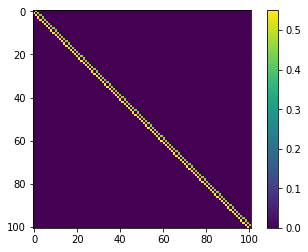

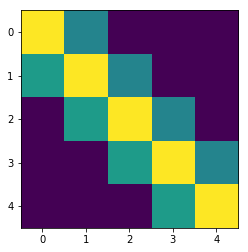

In [25]:
tm_FP_2 = transition_matrix_FP(dt, dx)

plt.imshow(tm_FP)
plt.colorbar()
plt.show()

plt.imshow(tm_FP_2[0:5, 0:5])
plt.show()

In [17]:
# Filling out the matrix
for t in range(M-1):
    matrix_FP_2[:, t + 1] = np.dot(matrix_FP_2[:, t], tm_FP_2.T)

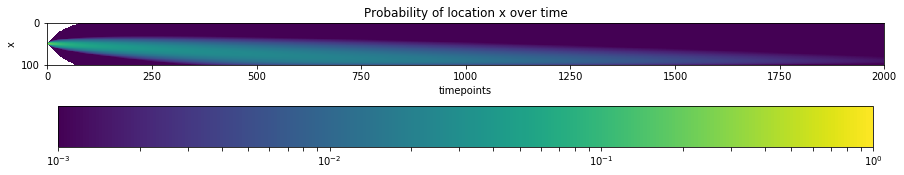

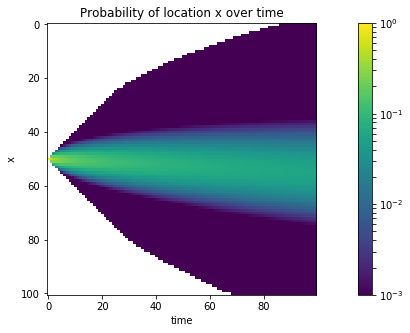

In [18]:
plt.figure(figsize = [15, 5])
plt.imshow(matrix_FP_2, norm=LogNorm(vmin=0.001, vmax=1))
plt.xlabel("timepoints")
plt.ylabel("x")
plt.colorbar(orientation = "horizontal")
plt.title("Probability of location x over time")
plt.show()

plt.figure(figsize = [15, 5])
plt.imshow(matrix_FP_2[:, 0:100], norm=LogNorm(vmin=0.001, vmax=1))
plt.xlabel("time")
plt.ylabel("x")
plt.colorbar()
plt.title("Probability of location x over time")
plt.show()

This looks much better, as there is now a probability of x not changing. it is even the most likely transition. the reason is like described in (3): with dt=1, keeping the state (x=x') is zero with the chosen dt, dx and sigma.

#### (5)

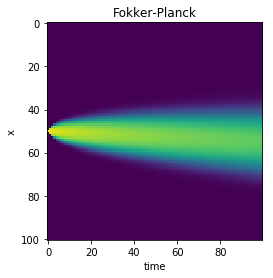

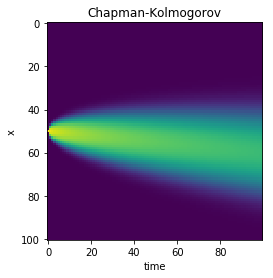

In [19]:
eta = 1.02

log_FP = -1 / np.log(matrix_FP_2 + eta)
log_CK = -1 / np.log(matrix + eta)

plt.title('Fokker-Planck')
plt.xlabel('time')
plt.ylabel('x')
plt.imshow(log_FP[:, 0:100])
plt.show()

plt.title('Chapman-Kolmogorov')
plt.xlabel('time')
plt.ylabel('x')
plt.imshow(log_CK[:, 0:100])
plt.show()

the Fokker-Planck graphic looks much more narrower than the Chapman-Kolomogorov. The reason for that is, that in the Chapman-Kolmogorov equation there is also a probability distribution for the transition. it is also quite liklely to have a transition distance of $\Delta x =2$ whereas in the Fokker-Planck Transition matrix have a probability greater than zero only for $x = x'$ and $x = x' +/-1$
- fokker planck is descretised so you can make steps, expecially you see this in the beginning

#### (6)

In [20]:
# Initialization
N = 2 * 50 + 1
dx = 1
dt = 0.5
M = int(1000 / dt)

mean_0 = int(N/2)
sigma_0 = 2


def gaussian(x, mean, sig):
    return np.exp(-np.power(x - mean, 2) / (2 * np.power(sig, 2)))

x_0 = np.arange(N)
x_0 = gaussian(x_0, int(N/2), 2)

matrix_Gauss_FP = np.zeros([N, M])
matrix_Gauss_FP[:, 0] = x_0

#### (7)

In [21]:
# Filling out the matrix
for t in range(M-1):
    matrix_Gauss_FP[:, t + 1] = np.dot(matrix_Gauss_FP[:, t], tm_FP_2.T)

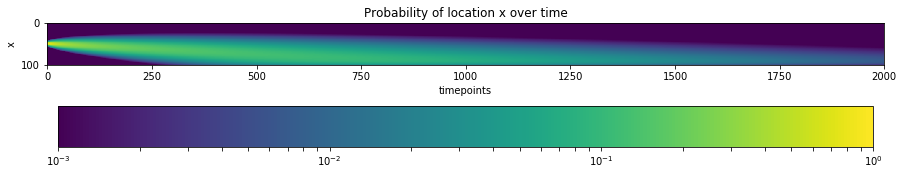

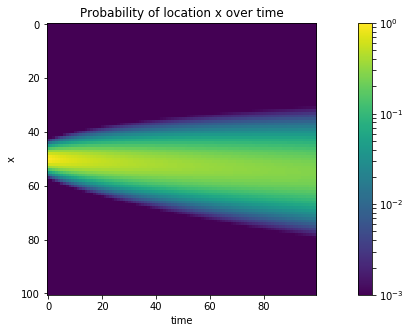

In [22]:
plt.figure(figsize = [15, 5])
plt.imshow(matrix_Gauss_FP, norm=LogNorm(vmin=0.001, vmax=1))
plt.xlabel("timepoints")
plt.ylabel("x")
plt.colorbar(orientation = "horizontal")
plt.title("Probability of location x over time")
plt.show()


plt.figure(figsize = [15, 5])
plt.imshow(matrix_Gauss_FP[:, 0:100], norm=LogNorm(vmin=0.001, vmax=1))
plt.xlabel("time")
plt.ylabel("x")
plt.colorbar()
plt.title("Probability of location x over time")
plt.show()

#### (8)

The Gaussian distribution as initial condition spreads the probability distribution over time for the state of the particle. An initial condition, that is not a fixed state but a distribution, brings more noise in the model. So along the complete time axis we are more unsure about the state of the particle. 
- derivation of this fokker planck operator assumes one can take the derivative of the density
- if the dens is the dirac delta it is not clear if the derivation remains valid